In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
AOD=[]
import xarray as xr
from netCDF4 import Dataset
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
AOD=[]
import xarray as xr
os.chdir("/home/ybh10/Scripts/")
from my_functions import *
os.chdir("/home/ybh10/Scripts/Post_Process/")
Daily_Stash=load_dict('Daily_Stash_Output.npy')
Monthly_Stash=load_dict('Monthly_Stash_Output.npy')
MODIS_Clim = np.load('/home/ybh10/Objective_2/Chemistry_Scheme/CHEM/MODIS2007_2014.npy')

os.chdir("/home/ybh10/Objective_2/")
inpath_lana=sorted(glob.glob('Lana/2003/*.nc'))
inpath_medusa=sorted(glob.glob('MEDUSA/2003/*.nc'))
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
vn1=xr.open_dataset('Lana/2003/bx_mole_concentration_of_dimethyl_sulfide_in_sea_water_2003_apr.nc')
lat=vn1.latitude
lon=vn1.longitude
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
lat_bnds = [-60, -40]
inpath_modis=sorted(glob.glob('/nesi/nobackup/niwa02757/ybh10/Observational_Data/MODIS/AOD/*.nc'))
latty_o=xr.open_dataset(inpath_modis[0])
lat_o=latty_o['lat']
lon_o=latty_o['lon']

In [2]:
lon_o

<xarray.DataArray 'lon' (lon: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    units:          degrees_east
    standard_name:  longitude
    bounds:         lon_bnds

In [3]:
modis_aod=[]
modis_aod_sh=[]
AOD_Ob=[]
AOD_Ob_sh=[]
d=np.arange(0,144,12)
modis=[]
modis_sh=[]
count=-1
upper= np.arange(12,145,12)

for pathway in (inpath_modis):
    lat_inds = np.where((lat_o > lat_bnds[0]) & (lat_o < lat_bnds[1]))
    lat_inds = np.squeeze(lat_inds)
    vn3=xr.open_dataset(pathway)
    modis_num=vn3['MYD08_M3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean'].data
    modis_shemi=vn3.MYD08_M3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean_Mean[lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1]
    modis_aod_sh.append(modis_shemi)
    modis_aod.append(modis_num)
    if pathway.find ('20141231.MONTH_12') !=-1: # Gets the last file in the loop, 
        for x in range(0,12): # 144 files produced, and sorts them to make every 5 file the
            count =count+1 # Same 12 months. E.G. It WAS J,A,S,O. But now its JJJJJJJJJJJJ,AAAAAAAAAAAA,SSSSSSSSSSSS...
            #print(count)
            for i in (d): # The d arange just sorts it every 5 files
              #  print("i+count={}".format(i+count))
             #   print(x)
                a_sh=modis_aod_sh[i+count]
                a=modis_aod[i+count]
                #a_lon=AOD_Obv_Lon[i+count]
                AOD_Ob.append(a)
                AOD_Ob_sh.append(a_sh)
                #AOD_Obby_Lon.append(a_lon)
                if i+count == 143 !=-1: ### The 143 is the last file for it to iterate though, resulting
                    for u in (upper): ## in the loop to go through this bit when it's done above.
                        a_a=AOD_Ob[u-12:u]
                        b_b=AOD_Ob_sh[u-12:u]  
                        ab=np.nanmean(a_a,axis=0) ## This loop gets the mean of all the same months - creating
                        bb=np.nanmean(b_b,axis=0)
                        modis.append(ab) ## a CLIMATOLOGY of 12 years, for each month, 
                        modis_sh.append(bb)
modis=np.array(modis)
modis_sh=np.array(modis_sh)

lat_so=latty_o.lat[lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1]


<ipython-input-3-5b133cca0c18>:36: RuntimeWarning: Mean of empty slice
  ab=np.nanmean(a_a,axis=0) ## This loop gets the mean of all the same months - creating
<ipython-input-3-5b133cca0c18>:37: RuntimeWarning: Mean of empty slice
  bb=np.nanmean(b_b,axis=0)


MODEL DATA EXTRACTION:
into the 2nd wavelength (550nm), then check_lat_lon to ensure lat runs N-S and lon runs 180W-180E.

In [4]:
lana_aod=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
lana_aod_sh=[]
for mon in (months):
    files='Lana/2003/bx_mole_concentration_of_dimethyl_sulfide_in_sea_water_2003_{}.nc'.format(mon)
    lat_inds = np.where((lat > lat_bnds[0]) & (lat < lat_bnds[1]))
    lat_inds = np.squeeze(lat_inds)
    vn1=xr.open_dataset(files)
    num=vn1['mole_concentration_of_dimethyl_sulfide_in_sea_water'].data
    num_sh=vn1['mole_concentration_of_dimethyl_sulfide_in_sea_water'][lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
    lana_aod.append(num)
    lana_aod_sh.append(num_sh)
    
lana_aod_sh=np.array(lana_aod_sh)
lana_aod=np.array(lana_aod)
MEDUSA_aod=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
MEDUSA_aod_sh=[]
for mon in (months):
    files='MEDUSA/2003/bw_mole_concentration_of_dimethyl_sulfide_in_sea_water_2003_{}.nc'.format(mon)
    vn2=xr.open_dataset(files)
    num=vn2['mole_concentration_of_dimethyl_sulfide_in_sea_water'].data
    num_sh=vn2['mole_concentration_of_dimethyl_sulfide_in_sea_water'][lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
    MEDUSA_aod.append(num)
    MEDUSA_aod_sh.append(num_sh)
    
MEDUSA_aod=np.array(MEDUSA_aod)
MEDUSA_aod_sh=np.array(MEDUSA_aod_sh)
lat_m_so=vn2.latitude[lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1]
#MEDUSA_aerosol=MEDUSA_aod[:,2]; lana_aerosol=lana_aod[:,2]
MEDUSA_aerosol=MEDUSA_aod; lana_aerosol=lana_aod
lana_check=check_lat_lon(lat,lon,lana_aerosol); MEDUSA_check=check_lat_lon(lat,lon,MEDUSA_aerosol)
lana_check_sh=check_lat_lon(lat_so,lon,lana_aod_sh); MEDUSA_check_sh=check_lat_lon(lat_so,lon,MEDUSA_aod_sh)

In [6]:
# fig = plt.figure(figsize=(20,15), edgecolor='w')
# ax = fig.add_subplot(1,1,1)
# clevs=np.arange(0,6.334135e-10,8.1273537e-13)
# ax.plot(a[7])
# ax.plot(a[1])
# #plt.yscale('log')

# plt.show()



In [7]:
mask1 = np.isnan(modis); mask2 = np.isnan(modis_sh)

In [8]:
lana_aerosol_2_sh=lana_check_sh[2];MEDUSA_aerosol_2_sh=MEDUSA_check_sh[2]

lana_aerosol_2=lana_check[2];MEDUSA_aerosol_2=MEDUSA_check[2]

lats=lana_check[0];lons=lana_check[1]

lats_sh=lana_check_sh[0];lons_sh=lana_check_sh[1]

In [9]:
# CHANGE LAT AND LONS to modis!
lana=my_interpolate(lats,lons,lana_aerosol_2,lat_o,lon_o)
medusa=my_interpolate(lats,lons,MEDUSA_aerosol_2,lat_o,lon_o) #12,180,360)

lana_sh=my_interpolate(lat_m_so,lons,lana_aerosol_2_sh,lat_so,lon_o)
medusa_sh=my_interpolate(lat_m_so,lons,MEDUSA_aerosol_2_sh,lat_so,lon_o) #12,180,360)

medusa[mask1] = np.nan
lana[mask1] = np.nan
medusa_sh[mask2] = np.nan
lana_sh[mask2] = np.nan

#### CHANGED ACCORDING TO IF I COMPARE MODELS.... i USE _aerosol. iF I COMPARE WITH MODIS, I USED 'Lana'
medusa_mean=np.nanmean(MEDUSA_aerosol_2,axis=0) # Or use 'lana'
lana_mean=np.nanmean(lana_aerosol_2,axis=0) # Or use 'medusa'
modis_mean=np.nanmean(modis,axis=0)
######################################################################################################

### MEAN FOR THE MAPS
LANA_AREAWEIGHT_MEAN=np.mean(areaweight(lana_aerosol,lat))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(MEDUSA_aerosol,lat))
MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis,lat_o))
mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MODIS_AREAWEIGHT_MEAN]

### MEAN FOR THE SH REGIONAL zonal
LANA_AREAWEIGHT_MEAN=np.mean(areaweight(lana_aod_sh,lat_m_so))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(MEDUSA_aod_sh,lat_m_so))
MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis_sh,lat_so))
sh_mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MODIS_AREAWEIGHT_MEAN]


<ipython-input-9-cfa650a52777>:16: RuntimeWarning: Mean of empty slice
  modis_mean=np.nanmean(modis,axis=0)


In [10]:
## WITH MODIS:
maps=[lana_mean,medusa_mean,modis_mean]
## DMS = 
maps=[np.nanmean(lana_aerosol_2,axis=0),np.nanmean(MEDUSA_aerosol_2,axis=0),(np.nanmean(MEDUSA_aerosol_2,axis=0)-np.nanmean(lana_aerosol_2,axis=0))]

sh_data=[lana_aod_sh,MEDUSA_aod_sh,modis_aod_sh]
monthly_data=[lana,medusa,modis]
sh_data=[lana_sh,medusa_sh,modis_sh]

In [11]:
RMSE=[]
from math import sqrt
from sklearn.metrics import mean_squared_error

data1= modis; data2 = lana ; data3 = medusa
rms_lana = sqrt(mean_squared_error(data1[~mask1],data2[~mask1]))
rms_medusa = sqrt(mean_squared_error(data1[~mask1],data3[~mask1]))

data1= modis_sh; data2 = lana_sh ; data3 = medusa_sh
rms_lana_sh = sqrt(mean_squared_error(data1[~mask2],data2[~mask2]))
rms_medusa_sh = sqrt(mean_squared_error(data1[~mask2],data3[~mask2]))
RMSE_SH=[rms_lana_sh,rms_medusa_sh,0]

rmse=[rms_lana,rms_medusa,0]
mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MODIS_AREAWEIGHT_MEAN]

In [12]:
###   For DJF:
DJF_lana=lana_aerosol_2[0],lana_aerosol_2[1],lana_aerosol_2[11]
DJF_medusa=MEDUSA_aerosol_2[0],MEDUSA_aerosol_2[1],MEDUSA_aerosol_2[11]
DJF_maps=maps=[np.nanmean(DJF_lana,axis=0),np.nanmean(DJF_medusa,axis=0),(np.nanmean(DJF_medusa,axis=0)-np.nanmean(DJF_lana,axis=0))]
DJF_lana=np.array(DJF_lana)
DJF_medusa=np.array(DJF_medusa)

LANA_AREAWEIGHT_MEAN=np.mean(areaweight(DJF_lana,lat))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(DJF_medusa,lat))
MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis,lat_o))

mapsy=np.array(DJF_maps)
mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN-LANA_AREAWEIGHT_MEAN]
means=np.array(mean)

# PLOTS:

## **Lana & MEDUSA & MODIS (2003 - 2014) DMS MMR**  


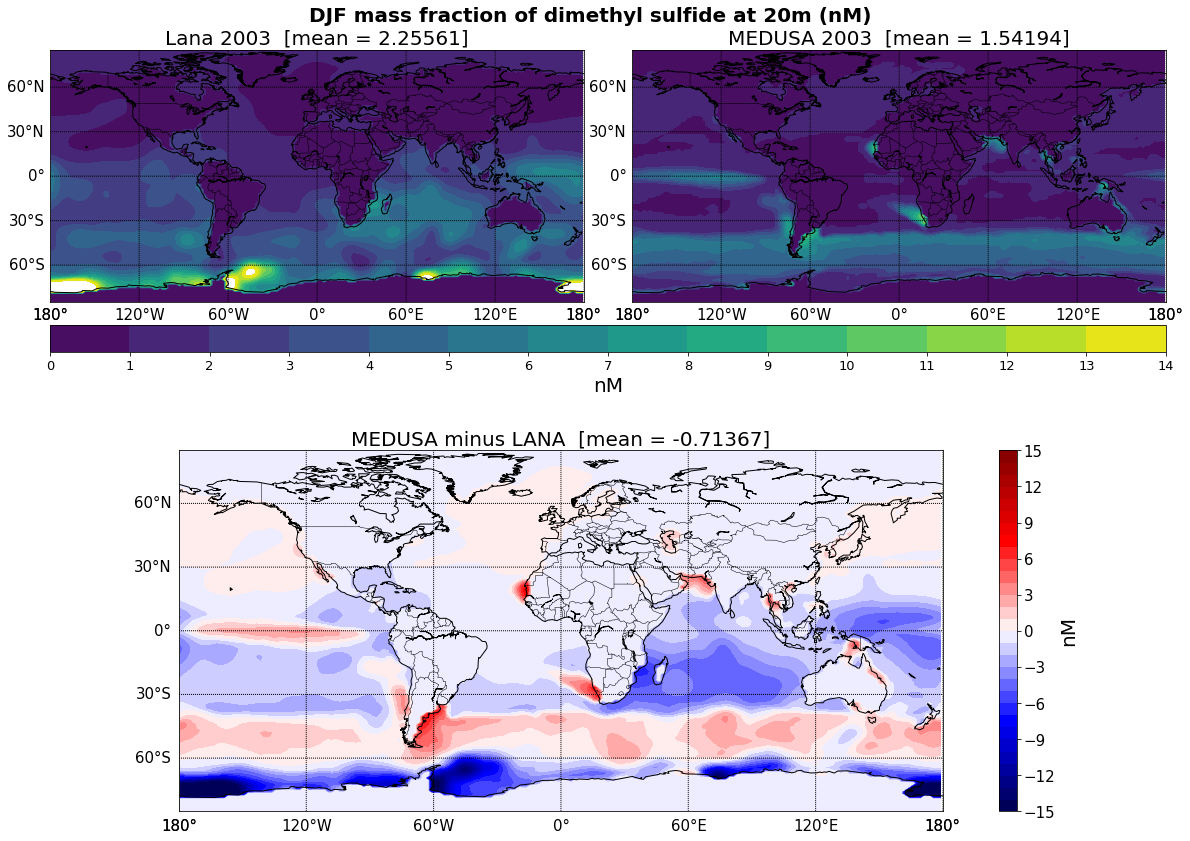

In [13]:
############################# DECEMBER, JANUARY, FEBRUARY
rmse=[rms_lana,rms_medusa,0]
title=['Lana 2003','MEDUSA 2003','MEDUSA minus LANA']

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.26, wspace=0.09)

ax = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]
for ax,mapy,titl,meany in  zip(axes,mapsy,title,means):
    ax1.grid(linestyle='--',alpha=0.5)
    map_ax1 = Basemap(llcrnrlon=-180.,llcrnrlat=-85,urcrnrlon=180.,urcrnrlat=85,
                    projection='cyl',resolution ='c',ax=ax)
    x, y = map_ax1(lon_o, lat_o) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    #mapy=mapy*1e9
  #  clevs=np.arange(0.0,0.60+0.04,0.04)
    clevs=np.arange(0.0,15,1)
    clevs1=np.arange(-15,15+1,1)

#     clevs1=np.arange(-300,300+30,30)
  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana 2003':
        mapy[mapy>15]=15
        cs1=ax.contourf(lons,lats,mapy,clevs,cmap='viridis')
        ax.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA 2003':
        ax1.contourf(lons,lats,mapy,clevs,cmap='viridis')
        ax1.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA minus LANA':
        mapy[mapy<-15]=-15
        cs=ax2.contourf(lons,lats,mapy,clevs1,cmap='seismic')
        ax2.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
#plt.tick_params(labelsize=20)
#cax = fig.add_axes([0.92, 0.1, 0.026, 0.71]) # Left, Bottom, Width, Height
cax = fig.add_axes([0.125, 0.55, 0.775, 0.025])

#cbar=fig.colorbar(cs,fraction=0.046, pad=0.04)
cbar=fig.colorbar(cs1, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(0,20+1,1))
        # ax1.set_yticklabels(y_labels)
cbar.ax.tick_params(labelsize=13); cbar.set_label('nM',fontsize=20)
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
fig.suptitle('DJF mass fraction of dimethyl sulfide at 20m (nM)',y=.87,fontsize=20,fontweight='bold')

cbar=fig.colorbar(cs, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-15,15+3,3))
cbar.set_label('nM',fontsize=20); cbar.ax.tick_params(labelsize=15)

#cbar.set_ticklabels(np.arange(0,60,4))
plt.show()
#plt.savefig("plots/DMS_conc/DMS/LANA_and_MEDUSA_DJF_SEAWATER_DMS_Map",dpi=600,bbox_inches = 'tight')



In [14]:
modis_concatenate=np.concatenate((modis[6:12],modis[0:6])); lana_concatenate=np.concatenate((lana_aerosol_2[6:12],lana_aerosol_2[0:6]));
medusa_concatenate=np.concatenate((MEDUSA_aerosol_2[6:12],MEDUSA_aerosol_2[0:6]))

modis_zonal=np.nanmean(modis_concatenate,axis=2); lana_zonal=np.nanmean(lana_concatenate,axis=2);
medusa_zonal=np.nanmean(medusa_concatenate,axis=2)

modis_zonal=modis_zonal.transpose(1,0);lana_zonal=lana_zonal.transpose(1,0);medusa_zonal=medusa_zonal.transpose(1,0);
zonal_figs=[lana_zonal,medusa_zonal,medusa_zonal-lana_zonal]
zonal_figss=np.array(zonal_figs)

<ipython-input-14-d5c0527bddec>:4: RuntimeWarning: Mean of empty slice
  modis_zonal=np.nanmean(modis_concatenate,axis=2); lana_zonal=np.nanmean(lana_concatenate,axis=2);


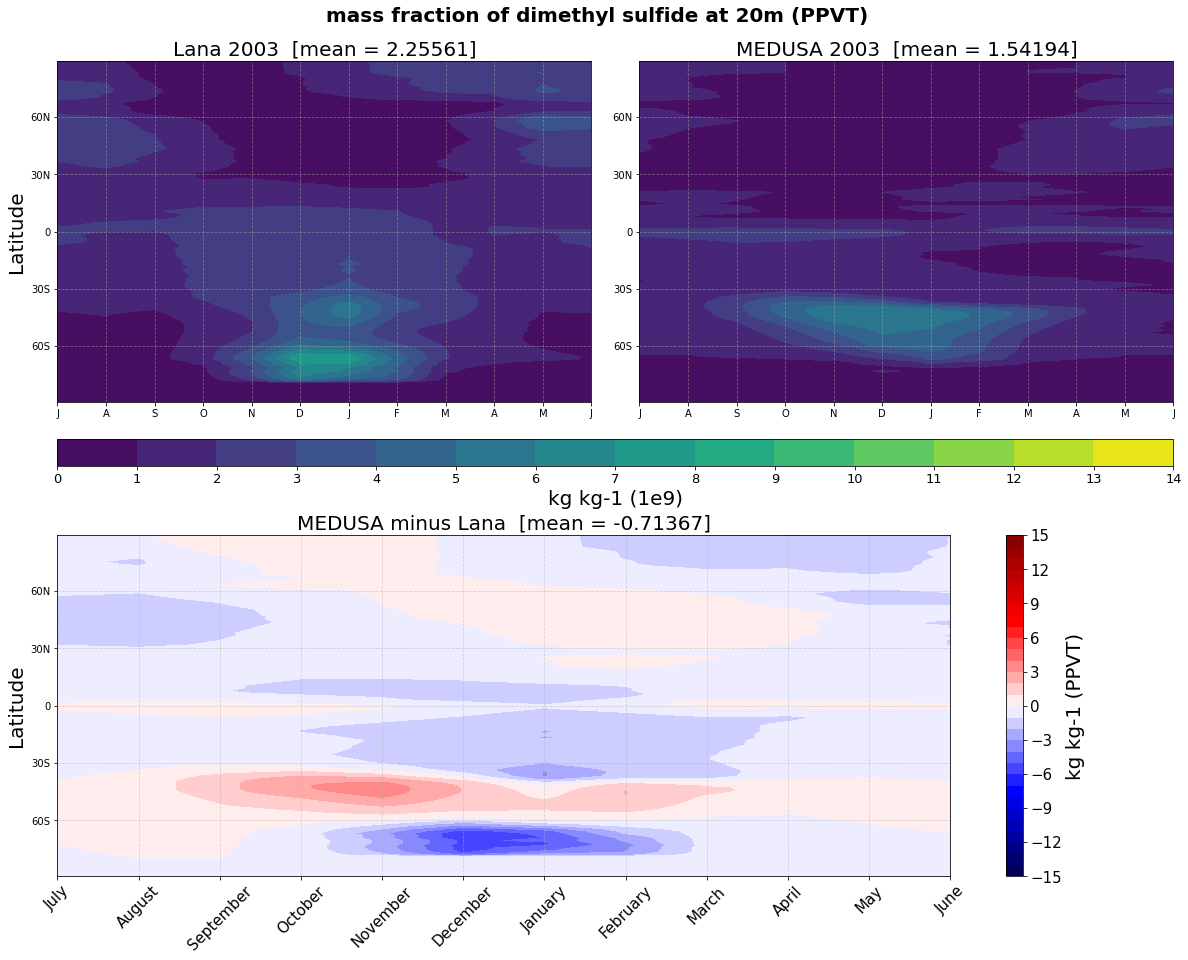

In [15]:
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
title=['Lana 2003','MEDUSA 2003','MEDUSA minus Lana']
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
#Date=np.array(Date)
DATE=np.concatenate((Dates[6:12],Dates[0:6]))
#np.concatenate((MODIS[6:12],MODIS[0:6]))
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.39, wspace=0.09)

ax = fig.add_subplot(2,2,1);ax1 = fig.add_subplot(2,2,2);ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]

for ax,mapy,titl,meany in  zip(axes,zonal_figss,title,means):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['90S','60S','30S','0','30N','60N','90N']
    ax.yaxis.set_ticks(np.arange(-90,90,30))
    ax.set_yticklabels(y_labels)

#    ax.set_yticks(y_labels)
    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    #ax.set_yticklabels(y_labels,fontsize=10,ticks = np.arange(-90,90,30))
    clevs=np.arange(0.0,15,1)
    clevs1=np.arange(-15,15+1,1)
    #clevs=np.arange(0.0,300,20)
    #clevs1=np.arange(-150,150+10,10)  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana 2003':
        cs=ax.contourf(DATE,lat,mapy,clevs,cmap='viridis')
        ax.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA 2003':
        ax1.contourf(DATE,lat,mapy,clevs,cmap='viridis')
        ax1.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA minus Lana':
        ax.set_ylabel('Latitude',fontsize=20)

        cs1=ax2.contourf(Dates,lat,mapy,clevs1,cmap='seismic')
        ax2.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
        
cax = fig.add_axes([0.125, 0.505, 0.775, 0.025])
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(0,20+1,1))
        # ax1.set_yticklabels(y_labels)
cbar.ax.tick_params(labelsize=13); cbar.set_label('kg kg-1 (1e9)',fontsize=20)
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
fig.suptitle('mass fraction of dimethyl sulfide at 20m (PPVT)',y=.93,fontsize=20,fontweight='bold')

cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-15,15+3,3))
cbar.set_label('kg kg-1 (PPVT)',fontsize=20); cbar.ax.tick_params(labelsize=15)

plt.show()
#plt.savefig("Zonal_LANA_and_MEDUSA_DJF_DMS",dpi=600,bbox_inches = 'tight')


In [16]:
zonal_DMS_rela_diff=((medusa_zonal/lana_zonal)-1)*100


dms_diff_mean=np.nanmean(zonal_DMS_rela_diff)


<ipython-input-16-d84d9fa4305d>:1: RuntimeWarning: invalid value encountered in true_divide
  zonal_DMS_rela_diff=((medusa_zonal/lana_zonal)-1)*100


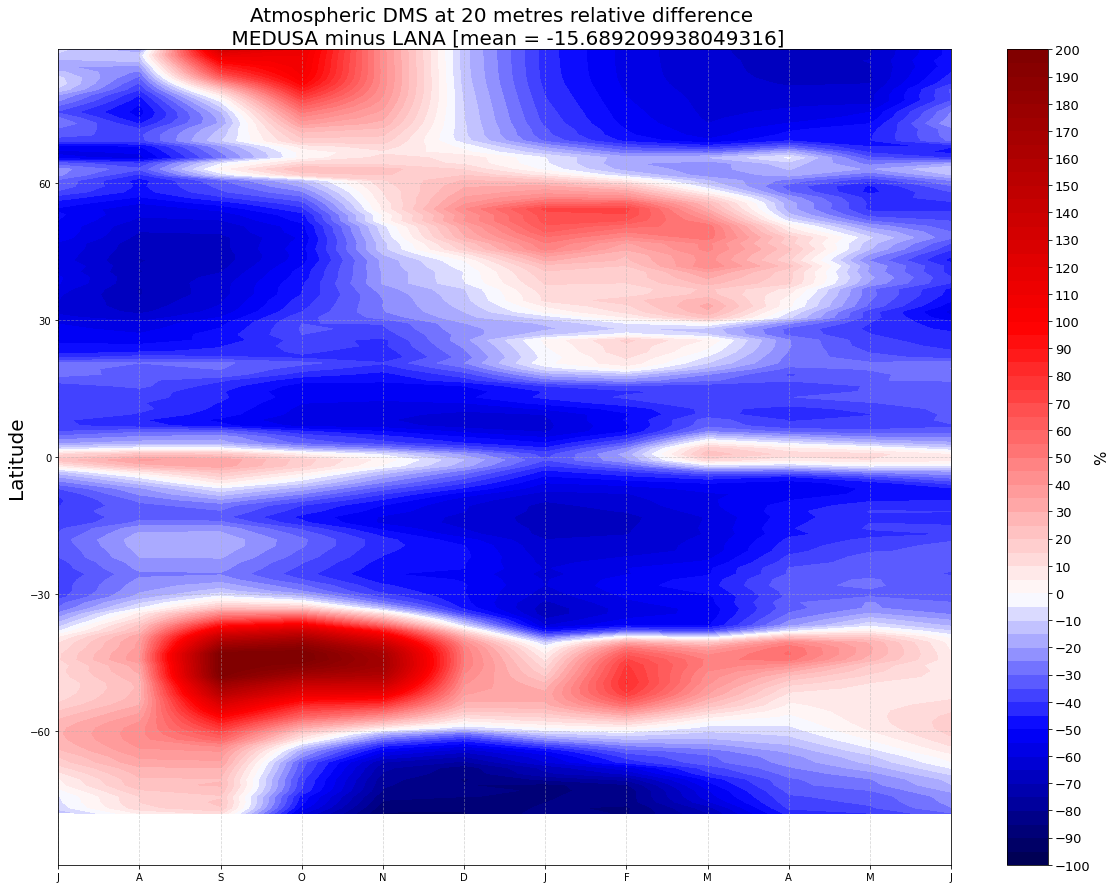

In [17]:
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
DATE=np.concatenate((Dates[6:12],Dates[0:6]))

title=['Lana to Modis','MEDUSA to Modis','MEDUSA to Lana', ]

fig = plt.figure(figsize=(20,15), edgecolor='w')
ax = fig.add_subplot(1,1,1)


orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.331, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=-1, midpoint=0.0, stop=1, name='shifted')

ax.grid(linestyle='--',alpha=0.5)
#y_labels = ['90S','80S','70S','60S','50S','40S','30S']
y_labels = ['90S','60S','30S','0','30N','60N','90N']
ax.yaxis.set_ticks(np.arange(-90,90,30))

ax.set_xticklabels(Date,fontsize=10)
clevs=np.arange(-100,200+5,5)
zonal_DMS_rela_diff[zonal_DMS_rela_diff>200]=200; mapy[mapy<-100]=-100
cs=ax.contourf(DATE,lat,zonal_DMS_rela_diff,clevs,cmap=shifted_cmap_modis)
ax.set_title("Atmospheric DMS at 20 metres relative difference \n MEDUSA minus LANA [mean = {}]".format(
             round(dms_diff_mean,5)),fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)
   
cbar=fig.colorbar(cs, ax=ax,extend='both',orientation='vertical',ticks = np.arange(-100,200+10,10))
cbar.ax.tick_params(labelsize=13); cbar.set_label('%',fontsize=15)


plt.show()
#plt.savefig("plots/DMS_conc/Zonal_Lana_MEDUSA_Relative_Difference_Plot_SEa_Water_DMS",dpi=600,bbox_inches = 'tight')


In [18]:
# ## NOVEMBER ###
nov_maps=lana_aerosol_2[9],MEDUSA_aerosol_2[9],MEDUSA_aerosol_2[9]-lana_aerosol_2[9]
nov_maps=np.array(nov_maps)
LANA_AREAWEIGHT_MEAN=np.mean(areaweight(lana_aerosol_2[9],lat))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(MEDUSA_aerosol_2[9],lat))
mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN-LANA_AREAWEIGHT_MEAN]

mapsy=np.array(nov_maps)
mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN-LANA_AREAWEIGHT_MEAN]
means=np.array(mean)

# ###   For SON:
# SON_lana=lana_aerosol_2[8],lana_aerosol_2[9],lana_aerosol_2[10]
# SON_medusa=MEDUSA_aerosol_2[8],MEDUSA_aerosol_2[9],MEDUSA_aerosol_2[10]
# SON_maps=maps=[np.nanmean(SON_lana,axis=0),np.nanmean(SON_medusa,axis=0),(np.nanmean(SON_medusa,axis=0)-np.nanmean(SON_lana,axis=0))]
# SON_lana=np.array(SON_lana)
# SON_medusa=np.array(SON_medusa)

# LANA_AREAWEIGHT_MEAN=np.mean(areaweight(SON_lana,lat))
# MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(SON_medusa,lat))
# MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis,lat_o))

# mapsy=np.array(SON_maps)
# mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN-LANA_AREAWEIGHT_MEAN]
# means=np.array(mean)

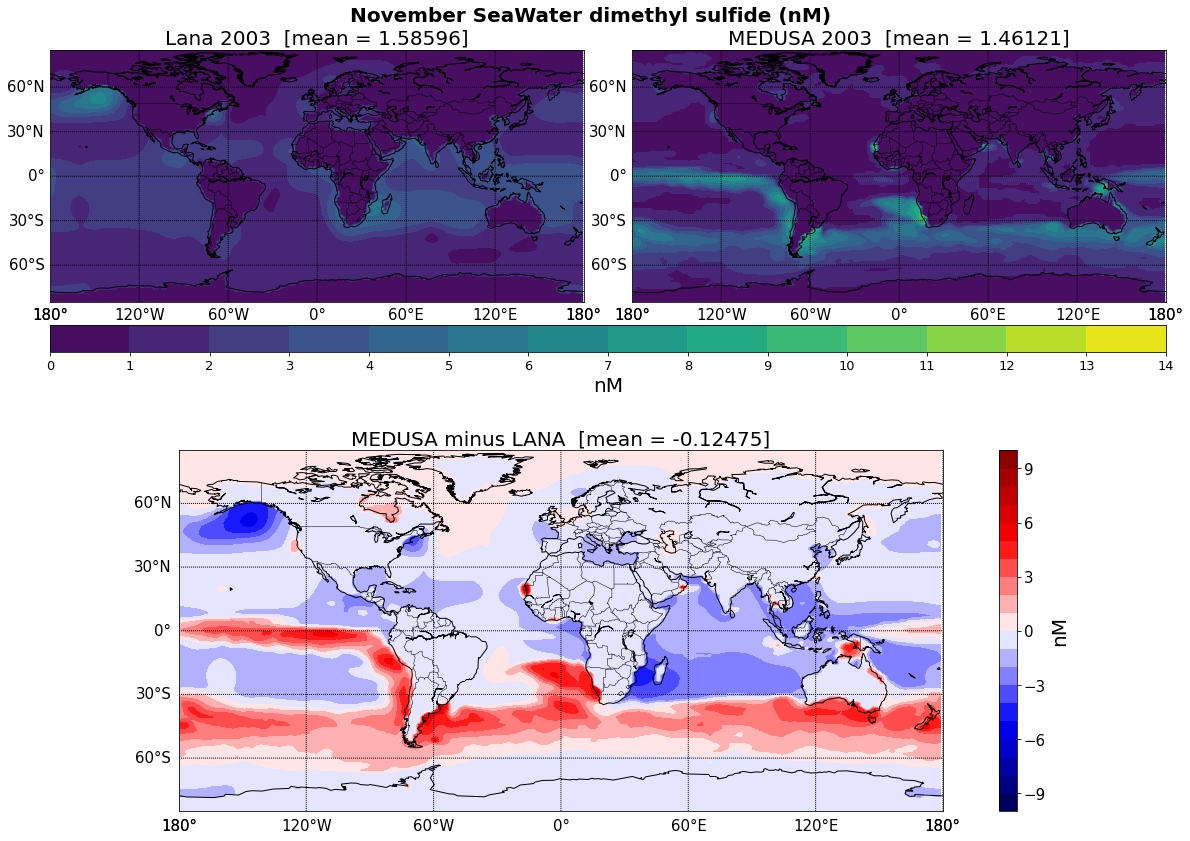

In [19]:
####### NOVEMBER #########
############################# DECEMBER, JANUARY, FEBRUARY
rmse=[rms_lana,rms_medusa,0]
title=['Lana 2003','MEDUSA 2003','MEDUSA minus LANA']

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.26, wspace=0.09)

ax = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]
for ax,mapy,titl,meany in  zip(axes,mapsy,title,means):
    ax1.grid(linestyle='--',alpha=0.5)
    map_ax1 = Basemap(llcrnrlon=-180.,llcrnrlat=-85,urcrnrlon=180.,urcrnrlat=85,
                    projection='cyl',resolution ='c',ax=ax)
    x, y = map_ax1(lon_o, lat_o) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    #mapy=mapy*1e9
  #  clevs=np.arange(0.0,0.60+0.04,0.04)
    clevs=np.arange(0.0,15,1)
    clevs1=np.arange(-10,10+1,1)

#     clevs1=np.arange(-300,300+30,30)
  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana 2003':
        mapy[mapy>15]=15
        cs1=ax.contourf(lons,lats,mapy,clevs,cmap='viridis')
        ax.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA 2003':
        ax1.contourf(lons,lats,mapy,clevs,cmap='viridis')
        ax1.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA minus LANA':
        mapy[mapy<-15]=-15
        cs=ax2.contourf(lons,lats,mapy,clevs1,cmap='seismic')
        ax2.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
#plt.tick_params(labelsize=20)
#cax = fig.add_axes([0.92, 0.1, 0.026, 0.71]) # Left, Bottom, Width, Height
cax = fig.add_axes([0.125, 0.55, 0.775, 0.025])

#cbar=fig.colorbar(cs,fraction=0.046, pad=0.04)
cbar=fig.colorbar(cs1, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(0,20+1,1))
        # ax1.set_yticklabels(y_labels)
cbar.ax.tick_params(labelsize=13); cbar.set_label('nM',fontsize=20)
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], fontsize=16, weight='bold')
fig.suptitle('November SeaWater dimethyl sulfide (nM)',y=.87,fontsize=20,fontweight='bold')

cbar=fig.colorbar(cs, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-15,15+3,3))
cbar.set_label('nM',fontsize=20); cbar.ax.tick_params(labelsize=15)

#cbar.set_ticklabels(np.arange(0,60,4))
plt.show()
#plt.savefig("plots/DMS_conc/DMS/LANA_and_MEDUSA_NOVEMBER_SEAWATER_DMS_Map",dpi=600,bbox_inches = 'tight')


# **SOUTHERN OCEAN DMS**
## Data

In [20]:
###   For DJF:
DJF_lana_sh=lana_aerosol_2_sh[0],lana_aerosol_2_sh[1],lana_aerosol_2_sh[11]
DJF_medusa_sh=MEDUSA_aerosol_2_sh[0],MEDUSA_aerosol_2_sh[1],MEDUSA_aerosol_2_sh[11]
DJF_maps=maps=[np.nanmean(lana_aerosol_2_sh,axis=2),np.nanmean(MEDUSA_aerosol_2_sh,axis=2),
               (np.nanmean(MEDUSA_aerosol_2_sh,axis=2)-np.nanmean(lana_aerosol_2_sh,axis=2))]
DJF_lana_sh=np.array(DJF_lana_sh)
DJF_medusa_sh=np.array(DJF_medusa_sh)

LANA_AREAWEIGHT_MEAN=np.mean(areaweight(DJF_lana_sh,lat_m_so))
MEDUSA_AREAWEIGHT_MEAN=np.mean(areaweight(DJF_medusa_sh,lat_m_so))
MODIS_AREAWEIGHT_MEAN=np.mean(areaweight(modis,lat_o))

mapsy=np.array(DJF_maps)
mean=[LANA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN,MEDUSA_AREAWEIGHT_MEAN-LANA_AREAWEIGHT_MEAN]
means=np.array(mean)

modis_concatenate=np.concatenate((modis[6:12],modis[0:6])); lana_concatenate=np.concatenate((lana_aerosol_2_sh[6:12],lana_aerosol_2_sh[0:6]));
medusa_concatenate=np.concatenate((MEDUSA_aerosol_2_sh[6:12],MEDUSA_aerosol_2_sh[0:6]))

modis_zonal=np.nanmean(modis_concatenate,axis=2); lana_zonal=np.nanmean(lana_concatenate,axis=2);
medusa_zonal=np.nanmean(medusa_concatenate,axis=2)

modis_zonal=modis_zonal.transpose(1,0);lana_zonal=lana_zonal.transpose(1,0);medusa_zonal=medusa_zonal.transpose(1,0);
zonal_figs=[lana_zonal,medusa_zonal,medusa_zonal-lana_zonal]
zonal_figss=np.array(zonal_figs)

<ipython-input-20-b45da32719eb>:20: RuntimeWarning: Mean of empty slice
  modis_zonal=np.nanmean(modis_concatenate,axis=2); lana_zonal=np.nanmean(lana_concatenate,axis=2);


5.907107


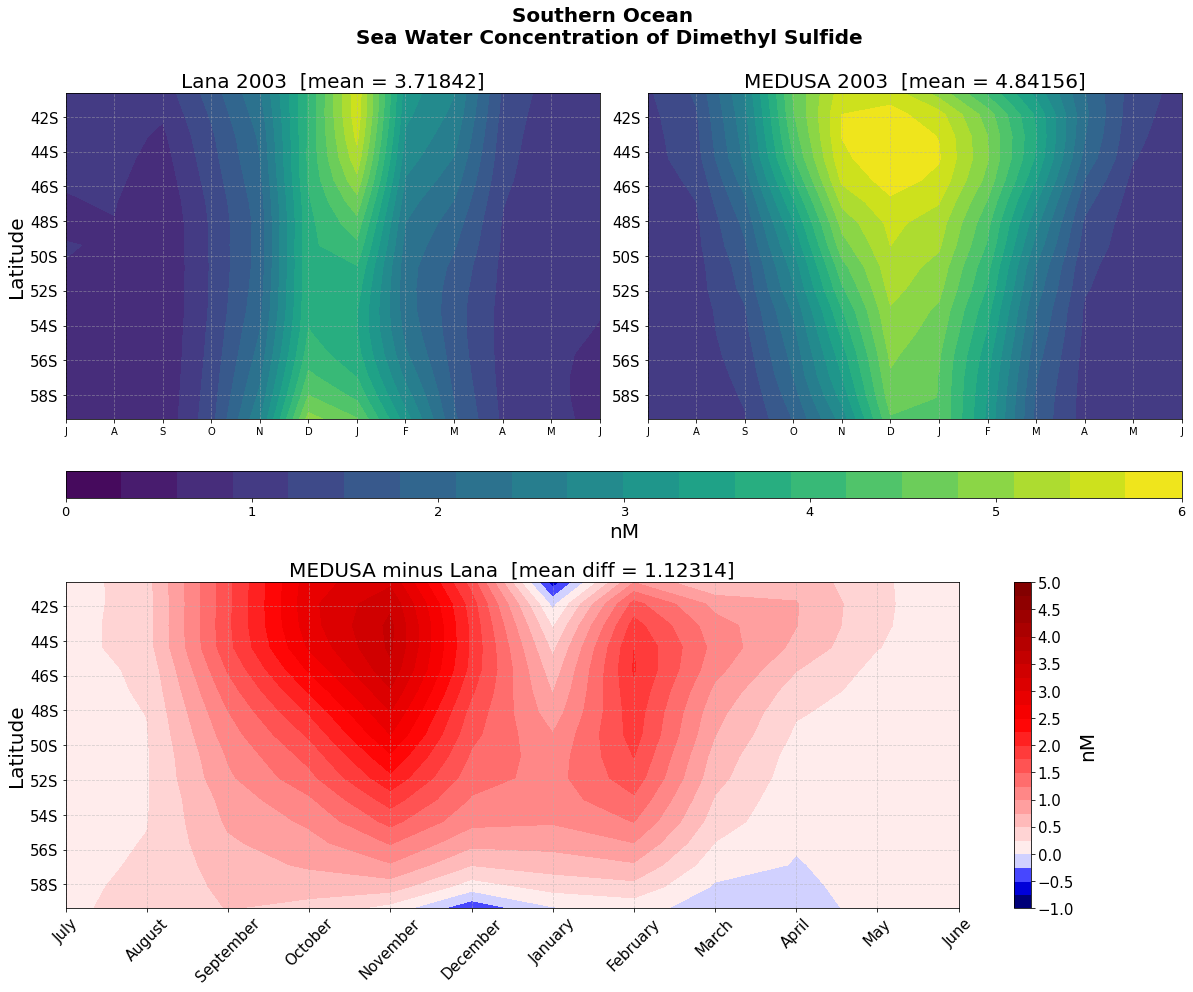

In [21]:
######################## FIGURE 1 ###########################
Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
title=['Lana 2003','MEDUSA 2003','MEDUSA minus Lana']
Date=['J','A','S','O','N','D','J','F','M','A','M','J']
#Date=np.array(Date)
DATE=np.concatenate((Dates[6:12],Dates[0:6]))
#np.concatenate((MODIS[6:12],MODIS[0:6]))
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
fig = plt.figure(figsize=(20,15), edgecolor='w')
fig.subplots_adjust(hspace=0.5, wspace=0.09)
orig_cmap = matplotlib.cm.seismic

ax = fig.add_subplot(2,2,1);ax1 = fig.add_subplot(2,2,2);ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.16, stop=1, name='shifted')

for ax,mapy,titl,meany in  zip(axes,zonal_figss,title,means):
    ax.grid(linestyle='--',alpha=0.5)
    #y_labels = ['90S','80S','70S','60S','50S','40S','30S']
    y_labels = ['60S','58S','56S','54S','52S','50S','48S','46S','44S','42S','40S']
    ax.yaxis.set_ticks(np.arange(-60,-40+2,2))
    ax.set_yticklabels(y_labels,fontsize=15)

#    ax.set_yticks(y_labels)
    ax.set_xticklabels(Date,fontsize=10)
    ax2.set_xticklabels(DATE,fontsize=15,rotation=45)
    #ax.set_yticklabels(y_labels,fontsize=10,ticks = np.arange(-90,90,30))
    clevs=np.arange(0.0,6+.3,0.3)
    clevs1=np.arange(-1,5+.25,.25)  #  DD[DD>0.40]=0.40
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
    if titl == 'Lana 2003':
        cs=ax.contourf(DATE,lat_m_so,mapy,clevs,cmap='viridis')
        ax.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
        ax.set_ylabel('Latitude',fontsize=20)
    if titl == 'MEDUSA 2003':
        ax1.contourf(DATE,lat_m_so,mapy,clevs,cmap='viridis')
        print(np.max(mapy))

        ax1.set_title("{}  [mean = {}]".format(titl,round(meany,5)),fontsize=20)
    if titl == 'MEDUSA minus Lana':
        ax.set_ylabel('Latitude',fontsize=20)

        cs1=ax2.contourf(Dates,lat_m_so,mapy,clevs1,cmap=shifted_cmap_dms)
        ax2.set_title("{}  [mean diff = {}]".format(titl,round(meany,5)),fontsize=20)
        
#plt.tick_params(labelsize=20)
cax = fig.add_axes([0.125, 0.505, 0.775, 0.025]) # Left, Bottom, Width, Height
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal',ticks = np.arange(0.0,10+1,1))
cbar.ax.tick_params(labelsize=13); cbar.set_label('nM',fontsize=20)
fig.suptitle('Southern Ocean \n Sea Water Concentration of Dimethyl Sulfide',y=.96,fontsize=20,fontweight='bold')

cbar=fig.colorbar(cs1, ax=ax2,extend='both',orientation='vertical',ticks = np.arange(-1,5+.5,.5))
cbar.set_label('nM',fontsize=20); cbar.ax.tick_params(labelsize=15)

plt.show()
#plt.savefig("plots/DMS_conc/Southern_Ocean_Zonal_Lana_MEDUSA_Plot_DMS_SeaWater",dpi=600,bbox_inches = 'tight')

In [22]:
### LINES ###
area=[areaweight(lana_aerosol,lat),areaweight(MEDUSA_aerosol,lat),
     areaweight((MEDUSA_aerosol-lana_aerosol),lat)]

s_area=[areaweight(lana_aod_sh,lat_m_so),areaweight(MEDUSA_aod_sh,lat_m_so),
              areaweight((MEDUSA_aod_sh-lana_aod_sh),lat_m_so)]

sh_area=[]
global_area=[]
for i,x in zip(area,s_area):
    c=np.concatenate((i[6:12],i[0:6]))
    global_area.append(c)
    d=np.concatenate((x[6:12],x[0:6]))
    sh_area.append(d)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


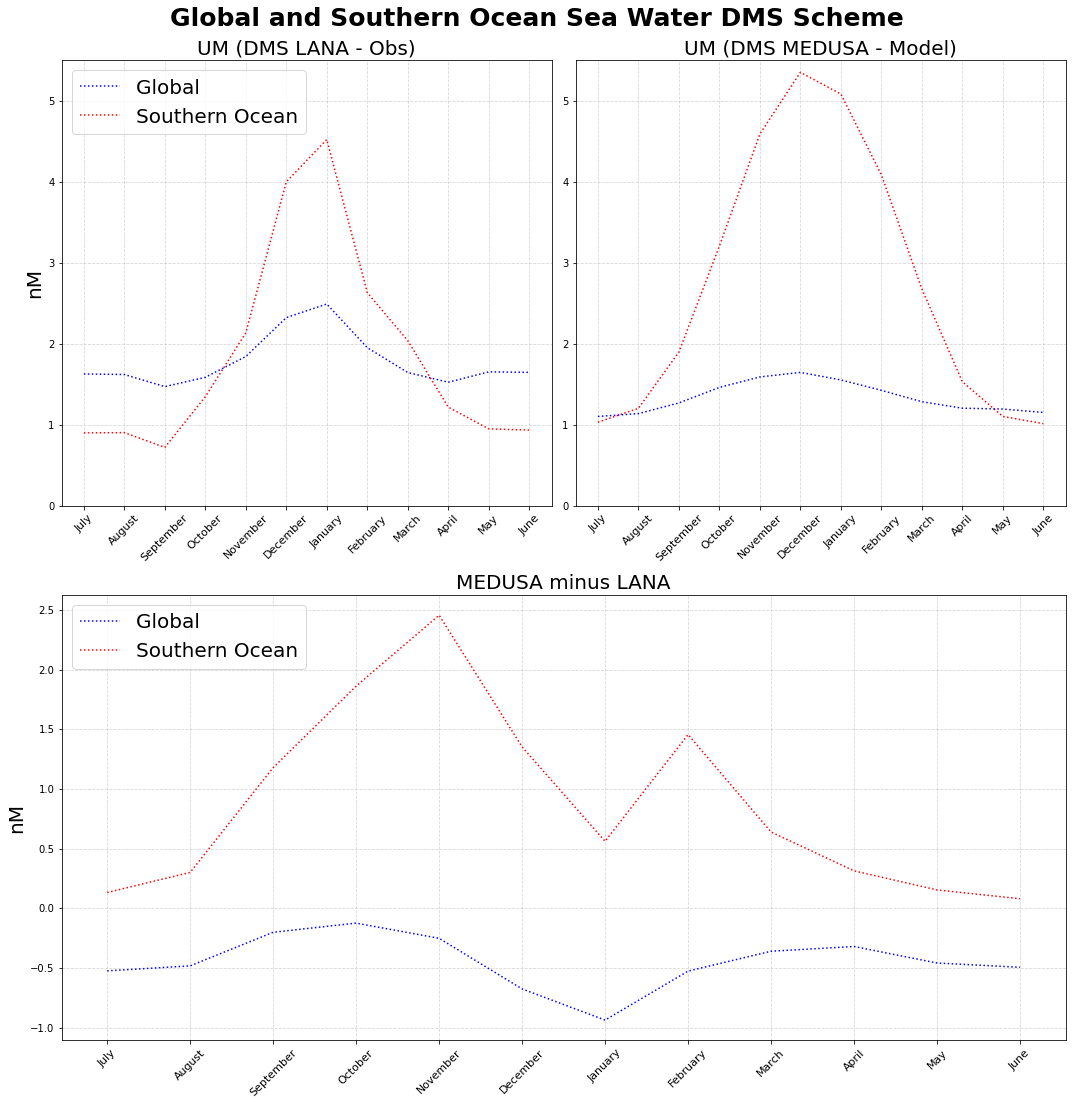

In [23]:
fig = plt.figure(figsize=(15,15), edgecolor='w')
fig.subplots_adjust(hspace=0.3, wspace=0.16)
ax = fig.add_subplot(2,2,1);ax1 = fig.add_subplot(2,2,2);ax2 = fig.add_subplot(2,2,(3,4))
axes=[ax,ax1,ax2]
#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(20,15))
#fig.subplots_adjust(hspace=0.2, wspace=0.1)
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
            
title=['UM (DMS LANA - Obs)','UM (DMS MEDUSA - Model)','MEDUSA minus LANA']
for axe,SH,GL,titl in zip(axes,sh_area,global_area,title,):
    axe.grid(linestyle='--',alpha=0.5)
   # axe.set_ylim([0.04,0.20])
   # ax.plot(Dates,SH,color='red',linestyle=':',label='Southern Ocean')
    #ax.plot(Dates,GL,linestyle=':',color='blue',label='Global ')

   # cs = ax.plot(Dates,DD,color='red',label='Southern Ocean')
   # ax.plot(Dates,GD,color='blue',label='Global')
    x=np.arange(0,12,1)
    axe.set_xticks(x)
    axe.set_xticklabels(DATE,fontsize=11,rotation=45)
    axe.set_title(titl,fontsize=20)
    plt.suptitle('Global and Southern Ocean Sea Water DMS Scheme',y=1.02,fontsize=25,fontweight='bold')
    if titl == 'UM (DMS LANA - Obs)':
        ax.set_ylabel('nM',fontsize=20)
        ax.set_ylim([0,5.5])
        ax.plot(DATE,GL,linestyle=':',color='blue',label='Global ')
        ax.plot(DATE,SH,color='red',linestyle=':',label='Southern Ocean')
    if titl == 'UM (DMS MEDUSA - Model)':
        ax1.set_ylim([0,5.5])
        ax1.plot(DATE,SH,color='red',linestyle=':',label='Southern Ocean')
        ax1.plot(DATE,GL,linestyle=':',color='blue',label='Global ')    
    if titl == 'MEDUSA minus LANA':
        ax2.plot(DATE,GL,linestyle=':',color='blue',label='Global ')    
        ax2.plot(DATE,SH,color='red',linestyle=':',label='Southern Ocean')
        ax2.set_ylabel('nM',fontsize=20)
    ax.legend(loc='upper left',fontsize=20)
    ax2.legend(loc='upper left',fontsize=20)


plt.tight_layout()
#plt.show()
#plt.savefig("plots/DMS_conc/Southern_Ocean_DMS_Line",dpi=600,bbox_inches = 'tight')

## **FOR POSTER**

# **so2**

In [109]:
### SO2
lana_so2=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
lana_so2_sh=[]
for mon in (months):
    files='Lana/2003/bx_mass_fraction_of_sulfur_dioxide_in_air_2003_{}.nc'.format(mon)
    lat_inds = np.where((lat > lat_bnds[0]) & (lat < lat_bnds[1]))
    lat_inds = np.squeeze(lat_inds)
    vn1=xr.open_dataset(files)
    num=vn1['mass_fraction_of_sulfur_dioxide_in_air'][0].data
    num_sh=vn1['mass_fraction_of_sulfur_dioxide_in_air'][0,lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
    lana_so2.append(num)
    lana_so2_sh.append(num_sh)
    
lana_so2_sh=np.array(lana_so2_sh)
lana_so2=np.array(lana_so2)
MEDUSA_so2=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
MEDUSA_so2_sh=[]
for mon in (months):
    files='MEDUSA/2003/bw_mass_fraction_of_sulfur_dioxide_in_air_2003_{}.nc'.format(mon)
    vn2=xr.open_dataset(files)
    num=vn2['mass_fraction_of_sulfur_dioxide_in_air'][0].data
    num_sh=vn2['mass_fraction_of_sulfur_dioxide_in_air'][0,lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
    MEDUSA_so2.append(num)
    MEDUSA_so2_sh.append(num_sh)
    
MEDUSA_so2=np.array(MEDUSA_so2)
MEDUSA_so2_sh=np.array(MEDUSA_so2_sh)

area=[areaweight(lana_so2,lat),areaweight(MEDUSA_so2,lat)]
s_area=[areaweight(lana_so2_sh,lat_m_so),areaweight(MEDUSA_so2_sh,lat_m_so)]
              
area=np.array(area)*(28.9644/64.0638)*1e12
s_area=np.array(s_area)*(28.9644/64.0638)*1e12
sh_so2_area=[]
global_so2_area=[]
for i,x in zip(area,s_area):
    c=np.concatenate((i[6:12],i[0:6]))
    global_so2_area.append(c)
    d=np.concatenate((x[6:12],x[0:6]))
    sh_so2_area.append(d)

# **CDNC**

In [170]:
### CNDC
lana_cdnc=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
lana_cdnc_sh=[]
clouds =['CNDC_at_cloud_top','CNDC_weight_cloud_top']
for cloud in (clouds):
    for mon in (months):
        files='Lana/2003/bx_{}_2003_{}.nc'.format(cloud,mon)
        lat_inds = np.where((lat > lat_bnds[0]) & (lat < lat_bnds[1]))
        lat_inds = np.squeeze(lat_inds)
        vn1=xr.open_dataset(files)
        num=vn1['unknown'].data
        num_sh=vn1['unknown'][lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
        lana_cdnc.append(num)
        lana_cdnc_sh.append(num_sh)
a=np.arange(0,12,1) 
lana_cdnc_nc=[]
lana_cdnc_sh_nc=[]
for n in (a):
    l=(lana_cdnc[n]/lana_cdnc[n+12])
    lana_cdnc_nc.append(l)
    d=(lana_cdnc_sh[n]/lana_cdnc_sh[n+12])
    lana_cdnc_sh_nc.append(d)
    
lana_cdnc_sh=np.array(lana_cdnc_sh_nc)
lana_cdnc=np.array(lana_cdnc_nc)
MEDUSA_cdnc=[]  # TAKES all AOD files of each month, sums it to make the AOD for each month. then stores this data as AOD.
MEDUSA_cdnc_sh=[]
for cloud in (clouds):
    for mon in (months):
        files='MEDUSA/2003/bw_{}_2003_{}.nc'.format(cloud,mon)
        lat_inds = np.where((lat > lat_bnds[0]) & (lat < lat_bnds[1]))
        lat_inds = np.squeeze(lat_inds)
        vn1=xr.open_dataset(files)
        num=vn1['unknown'].data
        num_sh=vn1['unknown'][lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:].data
        MEDUSA_cdnc.append(num)
        MEDUSA_cdnc_sh.append(num_sh)
a=np.arange(0,12,1) 
MEDUSA_cdnc_nc=[]
MEDUSA_cdnc_sh_nc=[]
for n in (a):
    l=(MEDUSA_cdnc[n]/MEDUSA_cdnc[n+12])
    MEDUSA_cdnc_nc.append(l)
    d=(MEDUSA_cdnc_sh[n]/MEDUSA_cdnc_sh[n+12])
    MEDUSA_cdnc_sh_nc.append(d)
    
MEDUSA_cdnc_sh=np.array(MEDUSA_cdnc_sh_nc)
MEDUSA_cdnc=np.array(MEDUSA_cdnc_nc)

area=np.array(area)
s_area=np.array(s_area)
area=[areaweight(lana_cdnc,lat),areaweight(MEDUSA_cdnc,lat)]
s_area=[areaweight(lana_cdnc_sh,lat_m_so),areaweight(MEDUSA_cdnc_sh,lat_m_so)]
              
    cdnc_gros=[]
    count=0
for x in (month):
    tester=num[:,:,count:count+x]
    count=x+count


    cdnc_grosn=np.nanmean(tester,axis=2)
    cdnc_gros.append(cdnc_grosn)
    
sh_cdnc_area=[]
global_cdnc_area=[]
for i,x in zip(area,s_area):
    c=np.concatenate((i[6:12],i[0:6]))
    global_cdnc_area.append(c)
    d=np.concatenate((x[6:12],x[0:6]))
    sh_cdnc_area.append(d)

<ipython-input-170-30d6d64cf00d>:19: RuntimeWarning: invalid value encountered in true_divide
  l=(lana_cdnc[n]/lana_cdnc[n+12])
<ipython-input-170-30d6d64cf00d>:42: RuntimeWarning: invalid value encountered in true_divide
  l=(MEDUSA_cdnc[n]/MEDUSA_cdnc[n+12])


In [443]:
lat_inds = np.where((lat_o > lat_bnds[0]) & (lat_o < lat_bnds[1]))
lat_inds = np.squeeze(lat_inds)
num=vn1['Nd'][:,lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1]
month=[31,28,31,30,31,30,31,31,30,31,30,31]
year=np.arange(2003,2016,1)
filey=[]
cdnc_gros=[]

for f in (year):
    vn1=xr.open_dataset('//nesi/nobackup/niwa02757/ybh10/Observational_Data/Grosvenor/Nd37_{}_SZA_LT_65_CF_GT_80_CTH_LT_3.2km.nc'.format(f))
    num=vn1['Nd'][:,lat_inds[0]:lat_inds[(len(lat_inds)-1)]+1,:]
    filey.append(num)
    count=0
    for x in (month):
        tester=num[:,:,count:count+x]
        count=x+count
        cdnc_grosn=np.nanmean(tester,axis=2)
        cdnc_gros.append(cdnc_grosn)


cdnc_grosner=make_climatology2(cdnc_gros)
cdnc_grosner=np.concatenate((cdnc_grosner[6:12],cdnc_grosner[0:6]))
cdnc_grosner=np.array(cdnc_grosner)
cdnc_grosner=cdnc_grosner.transpose(0,2,1)
GROS_AREAWEIGHT_MEAN=(areaweight(cdnc_grosner,lat_so))

<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,axis=2)
<ipython-input-443-d23de55dd93a>:17: RuntimeWarning: Mean of empty slice
  cdnc_grosn=np.nanmean(tester,

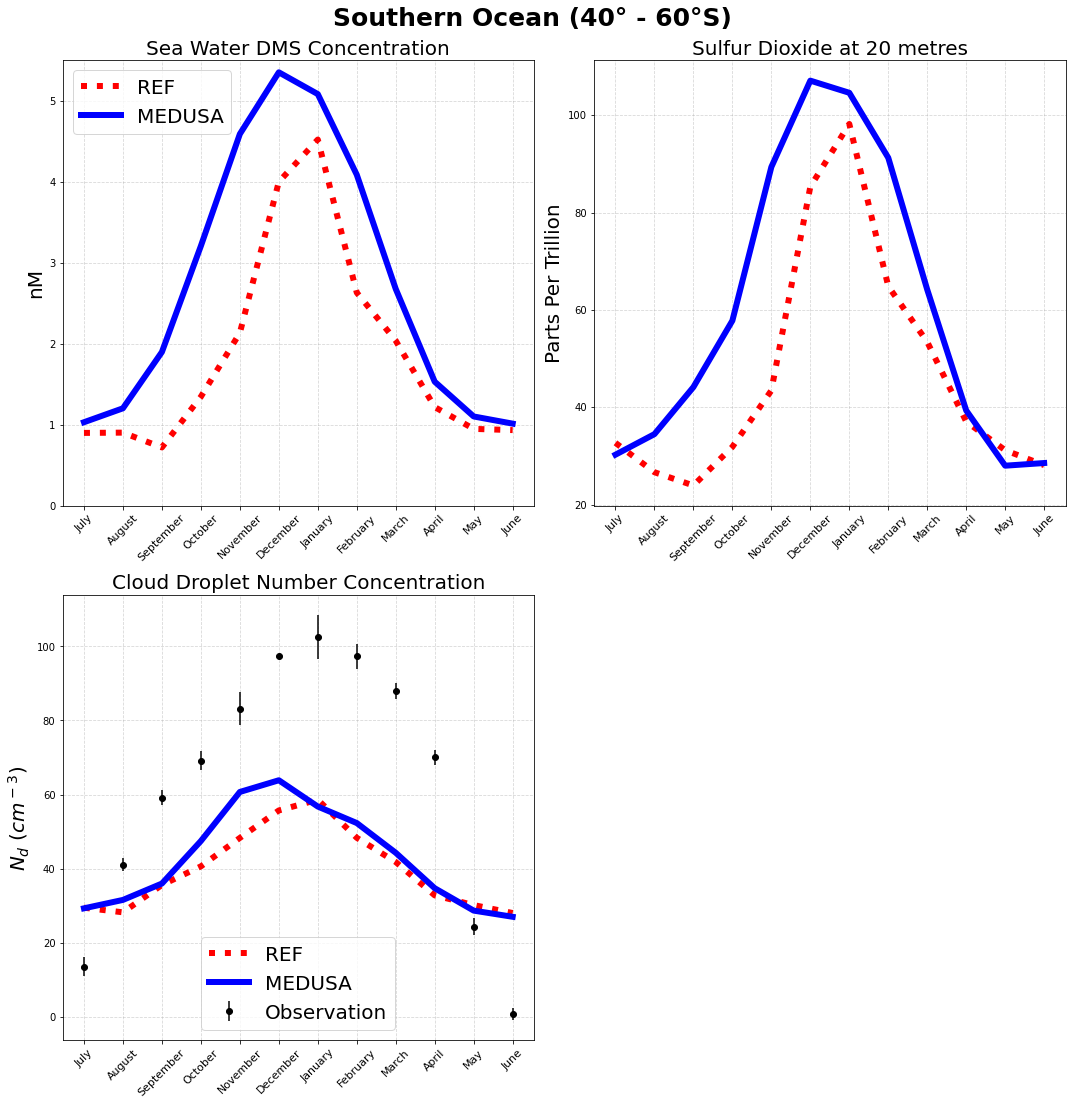

In [483]:
## ONLY FOR SOUTHERN OCEAN
fig = plt.figure(figsize=(15,15), edgecolor='w')
fig.subplots_adjust(hspace=0.3, wspace=0.16)
ax = fig.add_subplot(2,2,1);ax1 = fig.add_subplot(2,2,2)
axes=[ax,ax1]
#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(20,15))
#fig.subplots_adjust(hspace=0.2, wspace=0.1)
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12
sh_area=sh_area[0:2]
title=['Sea Water DMS Concentration','Sulfur Dioxide at 20 metres']
for axe,SH,SH_so2,cdnc,titl in zip(axes,sh_area,sh_so2_area,sh_cdnc_area,title,):
    axe.grid(linestyle='--',alpha=0.5)
   # axe.set_ylim([0.04,0.20])
   # ax.plot(Dates,SH,color='red',linestyle=':',label='Southern Ocean')
    #ax.plot(Dates,GL,linestyle=':',color='blue',label='Global ')

   # cs = ax.plot(Dates,DD,color='red',label='Southern Ocean')
   # ax.plot(Dates,GD,color='blue',label='Global')
    x=np.arange(0,12,1)
    axe.set_xticks(x)
    axe.set_xticklabels(DATE,fontsize=11,rotation=45)
    axe.set_title(titl,fontsize=20)
    plt.suptitle('Southern Ocean (40\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S) ',y=1.02,fontsize=25,fontweight='bold')
    if titl == title[0]:
        ax.set_ylabel('nM',fontsize=20)
        ax.set_ylim([0,5.5])
        ax1.plot(DATE,SH_so2,color='red',linestyle=':',linewidth=6,label='MEDUSA')
        ax.plot(DATE,SH,color='red',linewidth=6,linestyle=':',label='REF')
    if titl == title[1]:
        ax1.plot(DATE,SH_so2,color='blue',linewidth=6,label='REF')
        ax.plot(DATE,SH,color='blue',linewidth=6,label='MEDUSA')
    ax1.set_ylabel('Parts Per Trillion',fontsize=20)
    ax.legend(loc='upper left',fontsize=20)

ax2 = fig.add_subplot(2,2,3)
ax2.grid(linestyle='--',alpha=0.5)
x=np.arange(0,12,1)
ax2.set_xticks(x)
ax2.set_xticklabels(DATE,fontsize=11,rotation=45)
ax2.set_title('Cloud Droplet Number Concentration',fontsize=20)
ax2.plot(DATE,sh_cdnc_area[0],color='red',linestyle=':',linewidth=6,label='REF')
ax2.plot(DATE,sh_cdnc_area[1],color='blue',linewidth=6,label='MEDUSA')
ax2.legend(loc='upper left',fontsize=20)
ax2.set_ylabel(r'$N_{d}$ ($cm^-$$^3$)',fontsize=20)
ax2.errorbar(DATE,GROS_AREAWEIGHT_MEAN,yerr=aa,fmt='o',color='black',label='Observation')
ax2.legend(loc='lower center',fontsize=20)

GROS_AREAWEIGHT_MEAN
plt.tight_layout()
plt.show()
#plt.savefig("plots/DMS_conc/Poster/Southern_Ocean_Lines",dpi=600,bbox_inches = 'tight')